# Making Presentation & Prepping for Lab Report
### [RN] March 9th, 2021 11:07 AM

In my last notebook, I summarized my conclusions and compiled my paper-ready figures. 

## slides
Now i need to prepare my slides for my presentation tomorrow, and write up chunks for the methods section of the paper. Katherine is writing a bulk of the paper as we played to eachothers stregths; she has a strong background in muons and correlating with weather, whereas my strengths are hardware and software for experimental design. I will be writing sections to put in method and results which are directly related to the experimental design we discussed and agreed on. She will be writing a lot of the contextual material which turns our work into an actual project. 

My outline for slides is:
- what are we measuring? 
- how are we taking meausrements? 
- what kind of data are we working with? 
- sources of error i can attribute to experimental design 
- Data processing and first looks at data, and deciding what to do
- looking at normal (or abnormal distrbutions)
- determining what resulst are statistically significant 
- conclusions 

My presetntion will leave questions that will likely be answered by Katherine. I am purely focusing on the experimental design and analysis; and she is focusing in results, discussion, background info and literature review. We agreed on this and feel that our contributious are equal. 

I will have to rush through my slides because there is a lot to cover. 


### [RN] 12:55 PM

I am pretty happy with my slides. I will do one run through to check length, then send to Katherine to make sure we are on the same page. 

### [RN] 3:13 PM

I practiced and clocked in at 13 mins. I removed one slide (normal distrubution in quadrants, i think it is confusing). I will get the time down to ten minutes as i practice. I uploaded my slides to my git repo. 

## Writing
### [RN] 10:27 PM

**Hardware**. The device used to measure incident cosmic rays was provided by Dr. David Stuart. The main PCB component was designed by Matthew Dittrich. 

Two square prism scintillating bars, each with sides of 4 cm and length 50 cm were stacked vertically such that the longer axes were parallel to one another. The material of these bars generates a photon when a high energy particle like a muon is incident. Each bar is wrapped with reflective material, and then black electrical tape. On of the smaller faces of each bar is equipped with a photomultiplier tube (PMT) device, directly interfacing with the scintilating material. The PMT detects single photons, outputting an analog signal upon detection. Both PMT's (one on each bar), are fed into a PCB which filters the singals through two comporators set manually with a potentiometer, through an AND gate, then through a "stretch" stage. The stretch stage outputs a 1 ms long pulse when it is fed a pulse from the AND gate. This 1ms long pulse is much longer than the output of the AND stage, and is intended to enusre that the signal is readable for the following stage, an analog to digital converter (ADC). A Rasperry Pi 4 (Rpi) takes signals from the ADC for data collection and processing through GPIO pins. 

The scintillating bars were further wrapped with two sweatshirts to block out environmental light. The PMT's and Rpi are attatched to the main PCB using jumper cables. The PCB is powered directly from the Rpi 5V pin. The comparator thresholds were set manually using variable potentiometers. These potentiometers were adjusted to a regime where slight increase or decrease in resistance did not cause large changes in the number of signals allowed through. The bias voltage for the comparators was set in this rough manner due to lack of eqiuptment and short time scale. Once set, these potentiometers were not adjusted again. It is important to understand that other researchers using the same setup may see different absolute values for the frequency of muon incidents due to using a different bias voltage for the comparator. This is acceptable due to to the comparative nature of this study. We do not claim to be measuring muon incident frequency accurately, and acknowledge the systematic error the potetiometers on the comparator stage introduce. Leaving the resistance in place after intial setup allows us to take precise measurements to maintain the integrity of the study. In a more robust study, a variety of restistances should be tested and then set permanently on PCB's for more accurate measurements. 

Due to the highly penentrating nature of muons, only AND signals are accepted, as typical background radiation is not penetrating enough to trigger both scintillating bars at the same time. Additionally, in addition to blocking light, extra wrapping around the scintillating blocks is enough to protect against other common types of radiation, such as from the sun. Thus both scintillating blocks may really only produce a photon at the same time if a muon is normally incident to the upwards facing surfaces. It should also be noted that PMT's can generate deceptive output signals which resemble those of an incident photon when there was not one due to thermal excitation. PMT's were specifically chosen for this project because they are less likely than the alternative, a silicone photomultiplier, to give one of these false signals, or "dark counts". However it is still possible to have dark counts with a PMT. It is out of the scope of this project, but the authors reccomend that future researchers do dark count tests at different temperatures with PMT's. 

**Software**. Continous data collection of weather and muon incidence was achieved using python and bash scripts, assisted by crontab for automatic job scheduling in the Rasperian OS. python was used to read out GPIO pins from the PCB, recording all incidents where the GPIO pin was high, indicating an incident. Each timestamp was recorded in a raw data file. One raw data file was generated for each hour, headed with the date-time stamp and weather data. The output raw data file was generated one minute before the top of the hour using bash scripting. At exactly the top of the hour, a python script began to write out incident timestamps to the file. At exactly the top of the next hour, the python script was interrupted and would stop writing data out. Then the raw data would be processed to output a second file, which recorded the incidents per minute (IPM) for each minute in that hour. Additionally; the date-time stamp, average IPM, standard deviation, variance, range, and weather conditions from each hour were recorded in a master file which kept a running log of each hour the data collection ran. Each hour was given a directory containing a raw and processed data file. Each day was given a directory containing 24 directories, one for each hour. Processes, file management, and database managemant was achieved with bash scripts. Actual job scheduling and management was acheived using crontab, which allowed execution of multiple processes using root. Multithreading was used within python scripts for data readout, also to allow for multiprocssing in the interest of precise timing and truly continous data collection. 

Most recently updated weather data was scraped from [this](https://forecast.weather.gov/data/obhistory/metric/KSBA.html) site using bash cURL and string processing once every 15 minutes and appended to a master text file which contained all weather collection data from the duration of the experiment. Additionally, weather conditions from the represented hour were inserted into raw, processed, and master  files containing muon frequency data. There were gaps in the weather data set due to loss of internet connection. Weather data was updated once an hour, with one set of data per hour, by the NOAA website cited. This weather data was collected approximately one mile away from the muon incident measurement site. The authors have no affiliation to NOAA, and no access to how these measurements were taken and what kind of error they have. 


**Analysis** See TABLE XX below for paramaters and uncertainties. Error on incident timestamps, $\delta$t, while known, was not deemed particularly useful due to the comparative approach of this study.

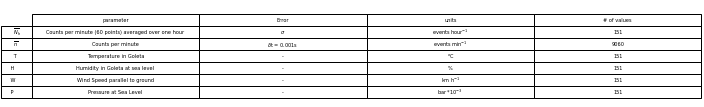

Given that the incident muon frequency range was about 75-85 IPM, the uncertainty of $\delta$t=1ms was not very relevant. Rather, statistical uncertainty given by standard deviation about the average IPM over the course of an hour gives more information as to how regular the IPM rate is. Additionally, averaging IPM over one hour and considering statisical uncertainty of:

$\sigma_{N_h} = \sqrt{\sum_1^{60}{\left(\overline{IPM}-IPM\right)^2\frac{1}{60}}}$

serves the interest of determining relationships of $\overline{N}_h$ and weather, since there is only one weather data point per hour. Considering that this study took place in Isla Vista, which has fairly stable and mild weather, this was deemed acceptable because weather does not change signifcantly over the course of one hour. There is to some degree random error introduced by taking one weather data point per hour, but taking $\overline{N}_h$ as the average IPM for every minute in an hour. For a more robust study, the authors reccoment in house data collection such that more frequent weather measurements may be made. However, it was determined by plotting weather data as histograms that the weather did change signficantly over time; as temperature, sea level air pressure, humidity, and wind speeds did not show normal distrubutions (FIG XX). A normal distrubution would indicate variance only due to random errors, and therefore indicate a lack of real change in weather and make it impossible to determine IPM dependance on weather.  

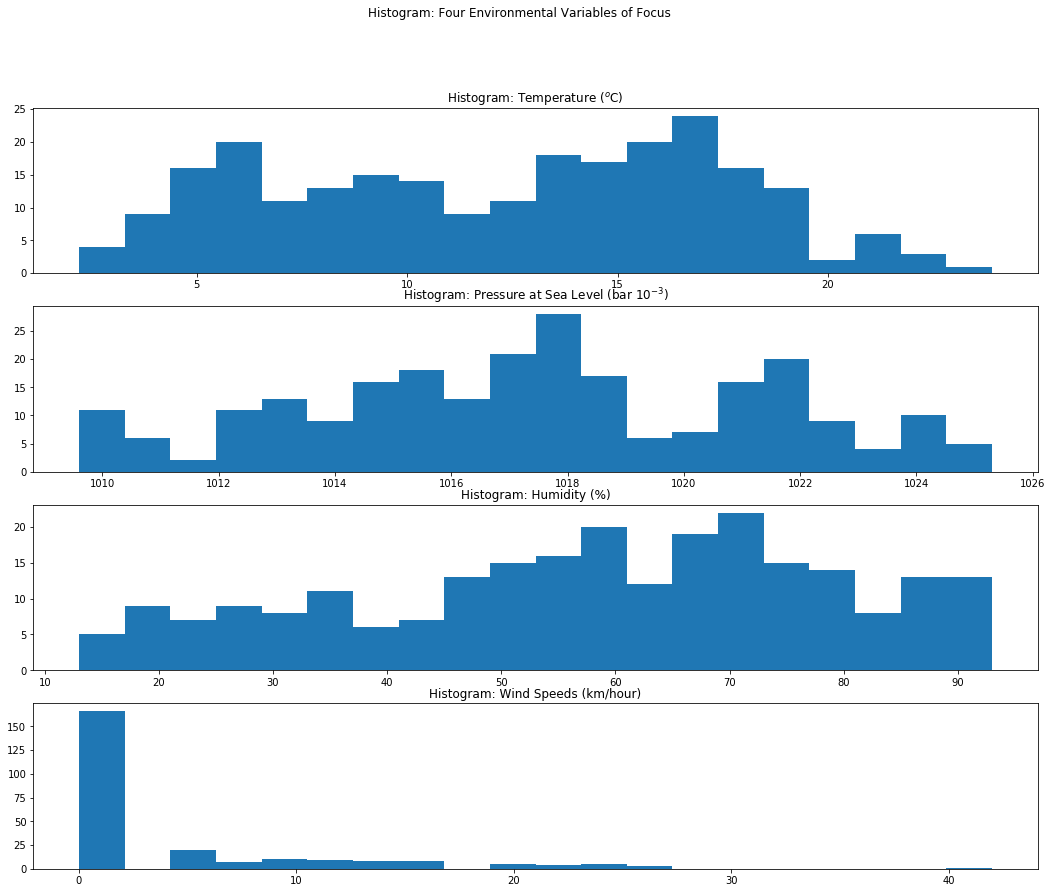

To search for correlations between $\overline{N}_h$ and weather, the data was plotted as scatter plots (FIG XX, should be in discussion so I will not include here). The scatter plots were fit to linear plots by minimization of residuals. The intention of using a linear fit was to evaluate a sort of rolling average over the range of weather measured. The linear fit is  not intended to quantify any relationships between weather and $\overline{N}_h$. To evaluate statiscial significance of the changing average over different weather conditins, the standard deviation from the fit for each weather parameter was calculated by: 

$\sigma_{\overline{N}_h} = \sqrt{\sum_1^{i}{\left(\overline{N}_{h, measured}-\overline{N}_{h, fit}(X)\right)^2\frac{1}{i}}}$
where X = P, W, H

For wind speed, air pressure, and humidity it was found that the measured $\overline{N}_h$ values at the low and high extremeties in weather were statically different. Statistically different was defined as, given a tolerance of $\pm \sigma_{\overline{N}_h}$, the first and last points in the linear fit on each scatter plot was not within range of eachother. Each end of the fitted line not beign within statistical error of the other shows that there is a real dependance between the given weather paramter and $\overline{N}_h$ which may not be chalked up to statistical error. Due to the small data set, the authors do not claim that these relationships have been quantified in this study. The deliverable outcome of this analysis is simply that $\overline{N}_h$ is dependant on air pressure, humidity, and wind speed. More robust experimentation is needed to quantify these relationships, and to prove that $\overline{N}_h$ is *not* dependant on temperature. 